In [2]:
#conda list
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#df1 = pd.read_stata('Datos/ESRU-EMOVI-2017/ESRU-EMOVI-2017-Entrevistado.dta', iterator = True)
# df1.variable_labels()
#df1.value_labels()
df = pd.read_stata('Datos/ENIGH-2016/ingresos.dta',      
convert_categoricals= False)
df.dtypes
df

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
0,0100003801,1,02,P009,,,,,,,7500.0,NaN,NaN,NaN,NaN,NaN,1844.26
1,0100003801,1,01,P001,09,08,07,06,05,04,18000.0,18000.0,18000.0,18000.0,18000.0,18000.0,53114.75
2,0100003801,1,02,P001,09,08,07,06,05,04,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,44262.29
3,0100003801,1,01,P009,,,,,,,6000.0,NaN,NaN,NaN,NaN,NaN,1475.40
4,0100003802,1,02,P040,10,09,08,07,06,05,0.0,0.0,0.0,0.0,5000.0,0.0,2459.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334332,3260801906,1,02,P022,10,09,08,07,06,05,0.0,0.0,2200.0,2000.0,2000.0,2000.0,4010.86
334333,3260801906,1,02,P053,10,09,08,07,06,05,500.0,0.0,300.0,200.0,0.0,300.0,635.86
334334,3260801906,1,04,P014,10,09,08,07,06,05,1080.0,0.0,0.0,0.0,0.0,0.0,528.26
334335,3260801906,1,04,P001,10,09,08,07,06,05,1200.0,500.0,0.0,0.0,0.0,0.0,831.52


In [5]:
#Familias principales de la vivienda e ingresos del jefe del hogar

def familiasintegrantes(df,foliohog,numren):
    
    confolio = [ df.foliohog == _ for _ in foliohog]
    confnum = [ df.numren == _ for _ in numren]
    
    aconfolio = 0
    for c in confolio:
        aconfolio = aconfolio | c 
    
    aconfnum = 0
    for c in confnum:
        aconfnum = aconfnum | c 
    
    con = aconfolio & aconfnum
    
    return df[con]
    
df1 = familiasintegrantes(df,['1','2'],['01'])
df1.foliohog.unique()
df1

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
1,0100003801,1,01,P001,09,08,07,06,05,04,18000.0,18000.0,18000.0,18000.0,18000.0,18000.0,53114.75
3,0100003801,1,01,P009,,,,,,,6000.0,NaN,NaN,NaN,NaN,NaN,1475.40
8,0100003802,1,01,P001,10,09,08,07,06,05,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11
10,0100003803,1,01,P001,09,08,07,06,05,04,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95
13,0100003804,1,01,P001,09,08,07,06,05,04,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,29508.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334328,3260801904,1,01,P072,10,09,08,07,06,05,1750.0,1750.0,1750.0,1750.0,1750.0,1750.0,5135.86
334329,3260801905,1,01,P032,10,09,08,07,06,05,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,17608.69
334330,3260801905,1,01,P044,10,09,08,07,06,05,1100.0,0.0,1100.0,0.0,1100.0,0.0,1614.13
334331,3260801906,1,01,P001,10,09,08,07,06,05,2200.0,2200.0,2200.0,2000.0,2000.0,2000.0,6163.04


In [8]:
# ingreso total por participante

def ingresosacu(df):
    df2 = df.groupby(by = ['numren','foliohog','folioviv']).sum()
    df2['claves'] = df.groupby(['numren','foliohog','folioviv'])['clave'].sum()
    df2.reset_index(level=0, inplace=True)
    df2.reset_index(level=0, inplace=True)
    df2.reset_index(level=0, inplace=True)
    # agregamos las claves del los ingresos
    df2['ing_men'] = df2.ing_tri/3
    return df2

df2 = ingresosacu(df1)
df2

,folioviv,foliohog,numren,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,claves,ing_men
0,0100003801,1,01,24000.0,18000.0,18000.0,18000.0,18000.0,18000.0,54590.15,P001P009,18196.716667
1,0100003802,1,01,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11,P001,15737.703333
2,0100003803,1,01,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95,P001,27540.983333
3,0100003804,1,01,15000.0,10000.0,10000.0,10000.0,10000.0,10000.0,30737.69,P001P009,10245.896667
4,0100003805,1,01,40000.0,12000.0,12000.0,12000.0,12000.0,12000.0,42295.07,P001P009,14098.356667
...,...,...,...,...,...,...,...,...,...,...,...,...
67814,3260438625,2,01,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,11803.27,P001,3934.423333
67815,3260547718,2,01,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,17704.91,P001,5901.636667
67816,3260547909,2,01,1700.0,750.0,1700.0,3200.0,4150.0,3200.0,7190.21,P042P022,2396.736667
67817,3260601317,2,01,950.0,0.0,950.0,0.0,950.0,0.0,1394.02,P042,464.673333


In [141]:
# agregamos el cohort de ESRU

def cohorts(df):
    
    cohorts = ['C'+ c for c in '123456']
    I = [(0,2400),(2400, 4800),(4800,7200),(7200,12000),(12000,24000),(24000,np.inf)]
    #L = [(c,i) for c,i in zip(cohorts,I)]

    df3 = df.copy()
    
    def coho(ing_men,cohorts,I):
        for a in range(len(I)):
            if I[a][0] < ing_men <= I[a][1]:
                return cohorts[a]
        return 0
    
    df3['cohort']=df3['ing_men'].apply(lambda x: coho(x,cohorts,I))
    
    return df3

df3 = cohorts(df2)
df3

,folioviv,foliohog,numren,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,claves,ing_men,cohort
0,0100003801,1,01,24000.0,18000.0,18000.0,18000.0,18000.0,18000.0,54590.15,P001P009,18196.716667,C5
1,0100003802,1,01,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,47213.11,P001,15737.703333,C5
2,0100003803,1,01,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,82622.95,P001,27540.983333,C6
3,0100003804,1,01,15000.0,10000.0,10000.0,10000.0,10000.0,10000.0,30737.69,P001P009,10245.896667,C4
4,0100003805,1,01,40000.0,12000.0,12000.0,12000.0,12000.0,12000.0,42295.07,P001P009,14098.356667,C5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66840,3260801324,1,01,3100.0,3500.0,2800.0,4800.0,3500.0,2800.0,9953.79,P051P009P001,3317.930000,C2
66841,3260801902,1,01,4700.0,3600.0,4700.0,3600.0,4700.0,3600.0,12179.34,P045P041,4059.780000,C2
66842,3260801904,1,01,2910.0,1750.0,2910.0,7750.0,2910.0,1750.0,9772.81,P043P044P072,3257.603333,C2
66843,3260801905,1,01,7100.0,6000.0,7100.0,6000.0,7100.0,6000.0,19222.82,P032P044,6407.606667,C3


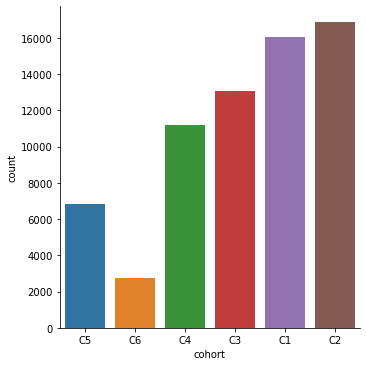

In [143]:
import seaborn as sns

def histogramacohort(df):
    df.cohort.astype('category')
    sns.catplot(x = "cohort",
            data = df,
            kind = 'count')
    plt.show()

histogramacohort(df3)

In [144]:
df3.dtypes

folioviv     object
foliohog     object
numren       object
ing_1       float64
ing_2       float64
ing_3       float64
ing_4       float64
ing_5       float64
ing_6       float64
ing_tri     float64
claves       object
ing_men     float64
cohort       object
dtype: object